In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

In [2]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

/home/vova/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


57344/57026 [==============================] - 1s 10us/step


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

Text(0.5,0,'Price')

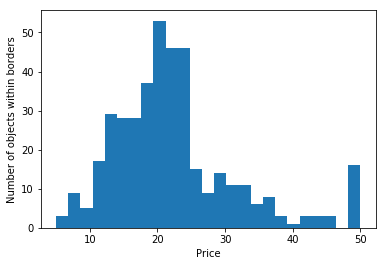

In [3]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [106]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = (16.0, 8.0)

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

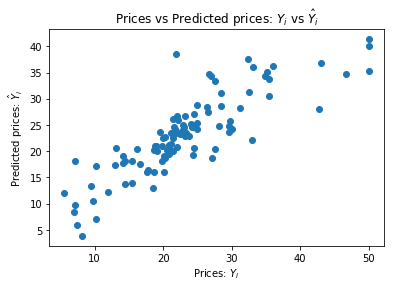

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [16]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.464185812406724
mse = 23.195599256422998
prediction variance = 45.78048685033721


In [101]:
All_train = np.hstack((X_train,y_train))
mae_all = []
mse_all = []
std_all = []
for i in range(10, 404, 5):
    
    mae = []
    mse = []
    std = []
    for _ in range(10):
        
        np.random.shuffle(All_train)
        N_X_train = All_train[0:i,:-1]
        N_y_train = All_train[0:i,-1:]
        lm.fit(N_X_train, N_y_train)
        y_pred = lm.predict(X_test)
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        std.append(np.std((y_test - y_pred)**2))
        
    mae_all.append(np.mean(np.array(mae)))
    mse_all.append(np.mean(np.array(mse)))
    std_all.append(np.mean(np.array(std)))
    
mae_all = np.array(mae_all)
mse_all = np.array(mse_all)
std_all = np.array(std_all)

(79,)

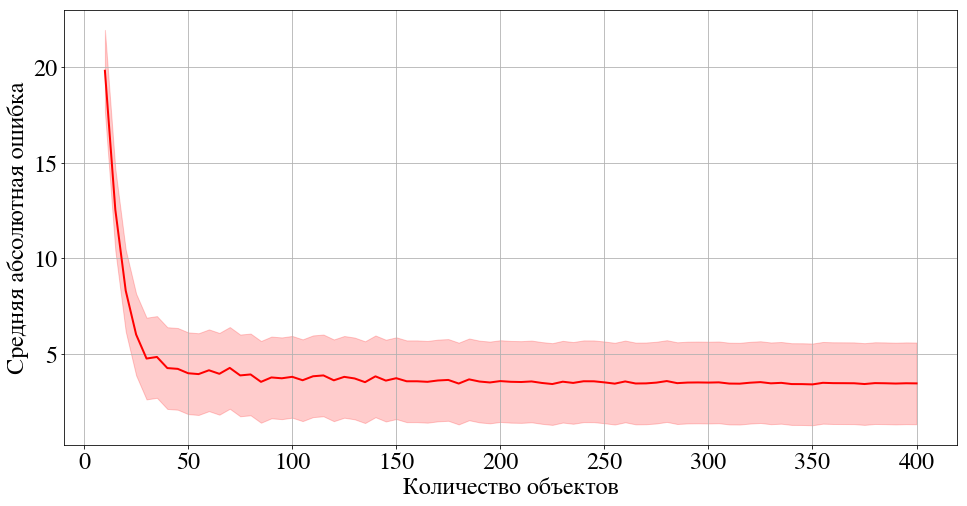

In [110]:
x = np.linspace(10,400,79)
plt.plot(x,mae_all,color='r')
plt.fill_between(x, mae_all-mae_all.std(), mae_all+mae_all.std(), color='r', alpha=0.2)
plt.xlabel('Количество объектов')
plt.ylabel('Средняя абсолютная ошибка')
plt.grid()
plt.savefig('fig_mae.pdf')

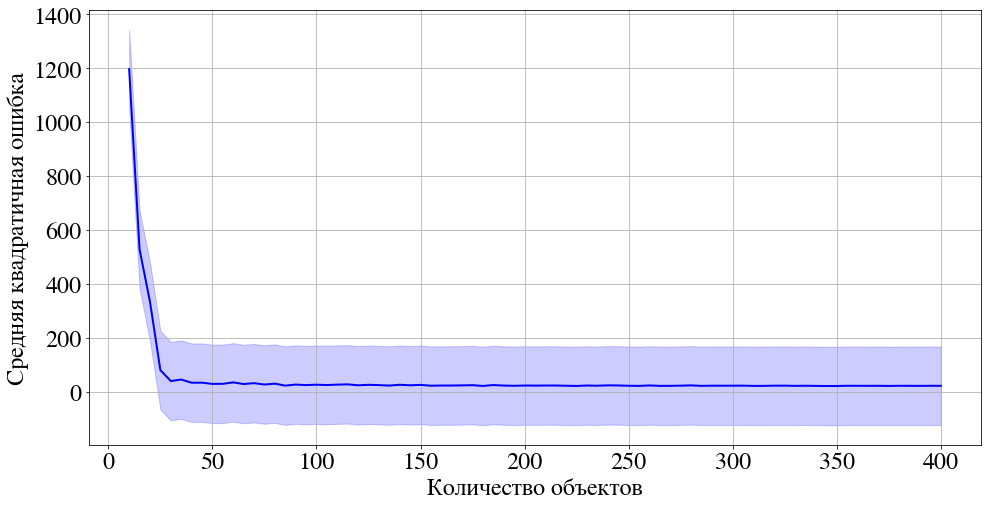

In [111]:
plt.plot(x,mse_all,color='b')
plt.fill_between(x, mse_all-mse_all.std(), mse_all+mse_all.std(), color='b', alpha=0.2)
plt.xlabel('Количество объектов')
plt.ylabel('Средняя квадратичная ошибка')
plt.grid()
plt.savefig('fig_mse.pdf')

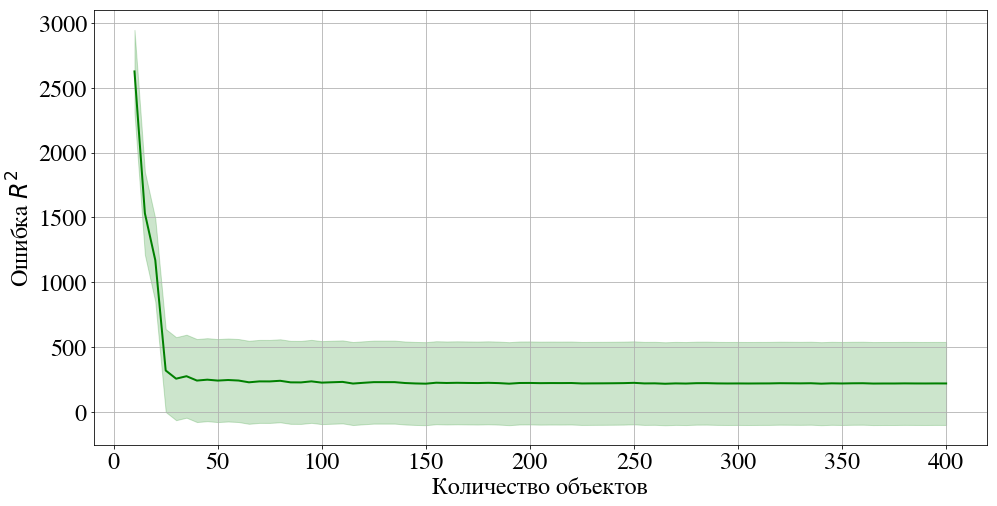

In [115]:
plt.plot(x,std_all,color='g')
plt.fill_between(x, std_all-std_all.std(), std_all+std_all.std(), color='g', alpha=0.2)
plt.xlabel('Количество объектов')
plt.ylabel('Ошибка $R^2$')
plt.grid()
plt.savefig('fig_std.pdf')